In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import pickle
import pandas as pd
from tqdm import tqdm
import seaborn as sns

from graspy.plot import heatmap

from mgcpy.independence_tests.dcorr import DCorr
from mgcpy.independence_tests.rv_corr import RVCorr
from mgcpy.independence_tests.mgc import MGC

from simulations import rho_ER_marg, rho_sbm_marg, rho_sbm_diff_block
from utils import sbm_params, dcorr_power, pearson_power, identity, block_permute, sort_graph, to_distance_mtx, to_kernel, estimate_block_assignment

In [3]:
%%time
n_arr = np.array([100]) #np.linspace(10, 100, 10, dtype=int)
rho_arr = np.array([0.1])
p = 0.5
q = 0.5
nmc = 500
k = 1
power_er = np.zeros((rho_arr.shape[0], n_arr.shape[0]))

for i, rho in enumerate(rho_arr):
    for j, n in enumerate(n_arr):
        blocks = np.repeat(np.arange(k), n//k)
        test = MGC(compute_distance_matrix=identity)
        test_power = dcorr_power(test, rho_ER_marg, given_blocks=True, blocks=blocks,
                                   rho=rho, p=p, q=q, n=n, mc=nmc)
        power_er[i, j] = test_power
        print('finish for rho={}, n={}'.format(rho, n))

finish for rho=0.1, n=100
CPU times: user 1min 10s, sys: 5.15 s, total: 1min 15s
Wall time: 38.5 s


In [5]:
power_er

array([[0.252]])

In [4]:
with open('../../results/power_er_mgc_debug.pkl', 'rb') as f:
    power_er = pickle.load(f)

Text(0, 0.5, 'power')

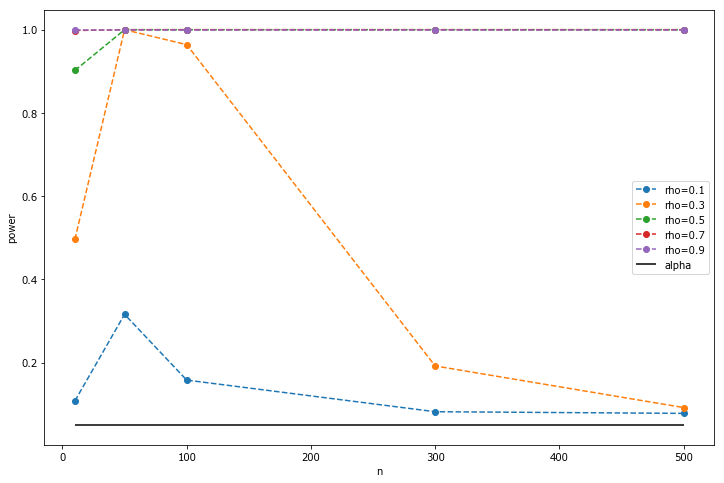

In [14]:
rho_arr = np.around(np.linspace(0.1, 0.9, 5, dtype=float), 1)
n_arr = np.array([10, 50, 100, 300, 500])
count = 0
plt.figure(figsize=(12, 8))
for i, rho in enumerate(rho_arr):
    power = []
    for j, n in enumerate(n_arr):
        power.append(power_er[count][1])
        count += 1
    plt.plot(n_arr, power, marker='o', linestyle='--', label='rho={}'.format(rho))
plt.hlines(y=0.05, xmin=np.amin(n_arr), xmax=np.amax(n_arr), label='alpha')
plt.legend()
plt.xlabel('n')
plt.ylabel('power')

In [19]:
mc = 500
rho = 0.1
P1 = sbm_params(a=0.7, b=0.3)
P2 = sbm_params(a=0.7, b=0.3)
k = 2
n = 100
indept_test = DCorr(compute_distance_matrix=identity)
test_stat_null_array = np.zeros(mc)
test_stat_alt_array = np.zeros(mc)
for i in tqdm(range(mc)):
    A, B = rho_sbm_marg(rho, AL=P1, BL=P2, k=k, n=n)
    block_assignment = np.repeat(np.arange(k), n//k)
    A_null = block_permute(A, block_assignment)
    B_sorted = sort_graph(B, block_assignment)

    test_stat_alt, _ = indept_test.test_statistic(
        matrix_X=to_distance_mtx(to_kernel(A)), matrix_Y=to_distance_mtx(to_kernel(B)))
    test_stat_null, _ = indept_test.test_statistic(
        matrix_X=to_distance_mtx(to_kernel(A_null)), matrix_Y=to_distance_mtx(to_kernel(B_sorted)))

    test_stat_alt_array[i] = test_stat_alt
    test_stat_null_array[i] = test_stat_null

100%|██████████| 500/500 [00:07<00:00, 70.21it/s]


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

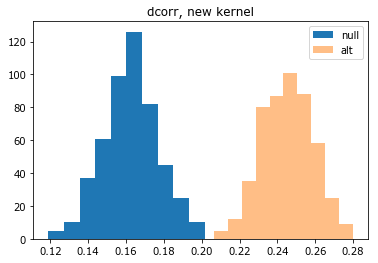

In [22]:
plt.hist(test_stat_null_array, label='null')
plt.hist(test_stat_alt_array, label='alt', alpha=0.5)
plt.legend()
plt.title('dcorr, new kernel')
plt.plot

In [6]:
mc = 500
rho = 0.1
P1 = sbm_params(a=0.7, b=0.3)
P2 = sbm_params(a=0.7, b=0.3)
k = 2
n = 100
indept_test = MGC(compute_distance_matrix=identity)
test_stat_null_array = np.zeros(mc)
test_stat_alt_array = np.zeros(mc)
for i in tqdm(range(mc)):
    A, B = rho_sbm_marg(rho, AL=P1, BL=P2, k=k, n=n)
    block_assignment = np.repeat(np.arange(k), n//k)
    A_null = block_permute(A, block_assignment)
    B_sorted = sort_graph(B, block_assignment)

    test_stat_alt, _ = indept_test.test_statistic(
        matrix_X=to_distance_mtx(to_kernel(A)), matrix_Y=to_distance_mtx(to_kernel(B)))
    test_stat_null, _ = indept_test.test_statistic(
        matrix_X=to_distance_mtx(to_kernel(A_null)), matrix_Y=to_distance_mtx(to_kernel(B_sorted)))

    test_stat_alt_array[i] = test_stat_alt
    test_stat_null_array[i] = test_stat_null

100%|██████████| 500/500 [00:39<00:00, 12.78it/s]


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

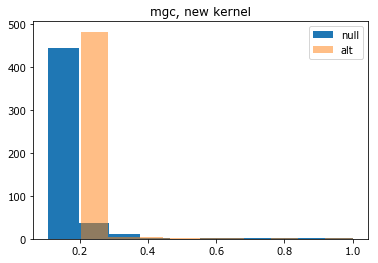

In [7]:
plt.hist(test_stat_null_array, label='null')
plt.hist(test_stat_alt_array, label='alt', alpha=0.5)
plt.legend()
plt.title('mgc, new kernel')
plt.plot

In [25]:
mc = 500
rho = 0.1
P1 = sbm_params(a=0.7, b=0.3)
P2 = sbm_params(a=0.7, b=0.3)
k = 2
n = 100
indept_test = DCorr(compute_distance_matrix=identity)
test_stat_null_array = np.zeros(mc)
test_stat_alt_array = np.zeros(mc)
for i in tqdm(range(mc)):
    A, B = rho_sbm_marg(rho, AL=P1, BL=P2, k=k, n=n)
    block_assignment = np.repeat(np.arange(k), n//k)
    A_null = block_permute(A, block_assignment)
    B_sorted = sort_graph(B, block_assignment)

    test_stat_alt, _ = indept_test.test_statistic(
        matrix_X=to_distance_mtx(A), matrix_Y=to_distance_mtx(B))
    test_stat_null, _ = indept_test.test_statistic(
        matrix_X=to_distance_mtx(A_null), matrix_Y=to_distance_mtx(B_sorted))

    test_stat_alt_array[i] = test_stat_alt
    test_stat_null_array[i] = test_stat_null

100%|██████████| 500/500 [00:06<00:00, 72.32it/s]


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

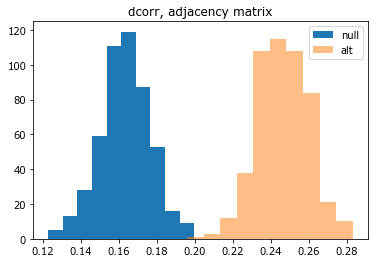

In [26]:
plt.hist(test_stat_null_array, label='null')
plt.hist(test_stat_alt_array, label='alt', alpha=0.5)
plt.legend()
plt.title('dcorr, adjacency matrix')
plt.plot

In [28]:
mc = 500
rho = 0.1
P1 = sbm_params(a=0.7, b=0.3)
P2 = sbm_params(a=0.7, b=0.3)
k = 2
n = 100
indept_test = MGC(compute_distance_matrix=identity)
test_stat_null_array = np.zeros(mc)
test_stat_alt_array = np.zeros(mc)
for i in tqdm(range(mc)):
    A, B = rho_sbm_marg(rho, AL=P1, BL=P2, k=k, n=n)
    block_assignment = np.repeat(np.arange(k), n//k)
    A_null = block_permute(A, block_assignment)
    B_sorted = sort_graph(B, block_assignment)

    test_stat_alt, _ = indept_test.test_statistic(
        matrix_X=to_distance_mtx(A), matrix_Y=to_distance_mtx(B))
    test_stat_null, _ = indept_test.test_statistic(
        matrix_X=to_distance_mtx(A_null), matrix_Y=to_distance_mtx(B_sorted))

    test_stat_alt_array[i] = test_stat_alt
    test_stat_null_array[i] = test_stat_null

100%|██████████| 500/500 [00:37<00:00, 13.33it/s]


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

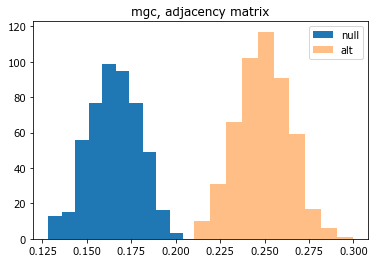

In [29]:
plt.hist(test_stat_null_array, label='null')
plt.hist(test_stat_alt_array, label='alt', alpha=0.5)
plt.legend()
plt.title('mgc, adjacency matrix')
plt.plot

In [2]:
A, B = rho_sbm_marg(rho=0.1, k=2, AL=sbm_params(a=0.7, b=0.3), BL=sbm_params(a=0.7, b=0.3), n=100)
mgc = MGC(compute_distance_matrix=identity)
dcorr = DCorr(compute_distance_matrix=identity)

In [9]:
flag = True
while flag:
    block_assignment = estimate_block_assignment(A, B)
    A_null = block_permute(A, block_assignment)
    B_sorted = sort_graph(B, block_assignment)
    ta10, mt10 = dcorr.test_statistic(to_distance_mtx(to_kernel(A_null)), to_distance_mtx(to_kernel(B_sorted)))
    ta20, mt20 = mgc.test_statistic(to_distance_mtx(to_kernel(A_null)), to_distance_mtx(to_kernel(B_sorted)))
    if ta20 > 0.3:
        flag = False
print(ta10)
print(ta20)

0.16765097205192248
0.5093930173168032


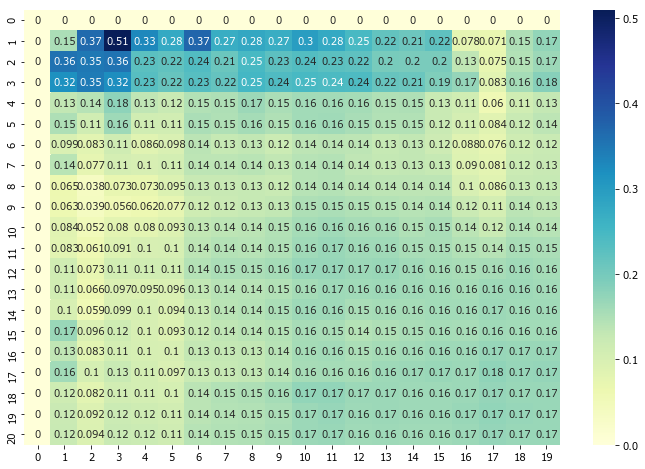

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(mt20['local_correlation_matrix'], annot=True, cmap="YlGnBu")

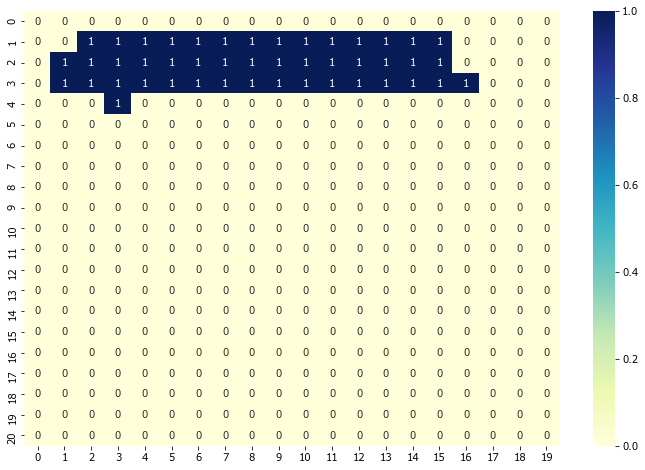

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(mt20['significant_connected_region'], annot=True, cmap="YlGnBu")

In [43]:
plt.figure(figsize=(12,8))
sns.heatmap(mt10['local_correlation_matrix'], annot=True, cmap="YlGnBu")

KeyError: 'local_correlation_matrix'

<Figure size 864x576 with 0 Axes>

In [51]:
np.unique(np.sum(A_null, axis=0)).size

21

In [52]:
mt20['local_correlation_matrix'].shape

(23, 21)

In [46]:
to_kernel(A_null)

array([[1.        , 0.        , 0.01952916, ..., 0.        , 0.        ,
        0.0180246 ],
       [0.        , 1.        , 0.02085144, ..., 0.01942572, 0.        ,
        0.        ],
       [0.01952916, 0.02085144, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.01942572, 0.        , ..., 1.        , 0.02094729,
        0.01869241],
       [0.        , 0.        , 0.        , ..., 0.02094729, 1.        ,
        0.        ],
       [0.0180246 , 0.        , 0.        , ..., 0.01869241, 0.        ,
        1.        ]])